<a href="https://colab.research.google.com/github/Kirans1ngh/Machine-Learning-practice/blob/main/Linear%20regression/Linear_Regression_with_various_Libraries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- California Housing Dataset (First 5 Rows) ---
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


--- NumPy Model ---
Intercept (theta0): 0.4446
Coefficient (theta1): 0.4193

--- Model Evaluation ---
Mean Squared Error (MSE): 0.7091
R² Score: 0.4589



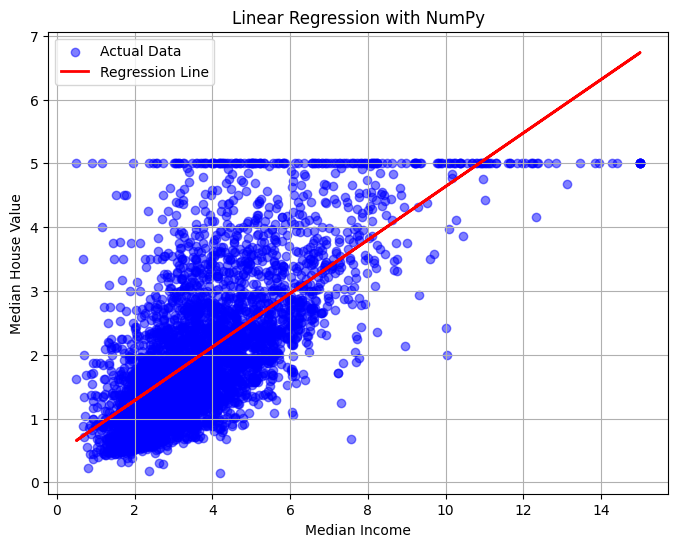

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load and Prepare Data
# Load as a pandas DataFrame to easily display it
housing_df = fetch_california_housing(as_frame=True)
df = housing_df.frame

# Show the first 5 rows of the dataset
print("--- California Housing Dataset (First 5 Rows) ---")
print(df.head())
print("\n") # Add a newline for better formatting

# Feature: Median Income (extracting as a NumPy array)
X = df[['MedInc']].values
# Target: Median House Value (extracting as a NumPy array)
y = df['MedHouseVal'].values.reshape(-1, 1)


# 2. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Model Training (using the Normal Equation)
# Add a bias term (column of ones) to X_train for the intercept
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]

# The Normal Equation: theta = (X^T * X)^-1 * X^T * y
# This directly calculates the best parameters (theta0 and theta1)
theta_best = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train)

# Extract intercept (theta0) and coefficient (theta1)
intercept = theta_best[0][0]
coefficient = theta_best[1][0]

print("--- NumPy Model ---")
print(f"Intercept (theta0): {intercept:.4f}")
print(f"Coefficient (theta1): {coefficient:.4f}\n")

# 4. Evaluation
# Add bias term to the test set to make predictions
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]
y_pred = X_test_b.dot(theta_best)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("--- Model Evaluation ---")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}\n")

# 5. Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color="blue", alpha=0.5, label="Actual Data")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Regression Line")
plt.title("Linear Regression with NumPy")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.legend()
plt.grid(True)
plt.show()

--- Scikit-learn Model ---
Intercept: 0.4446
Coefficient: 0.4193

--- Model Evaluation ---
Mean Squared Error (MSE): 0.7091
R² Score: 0.4589



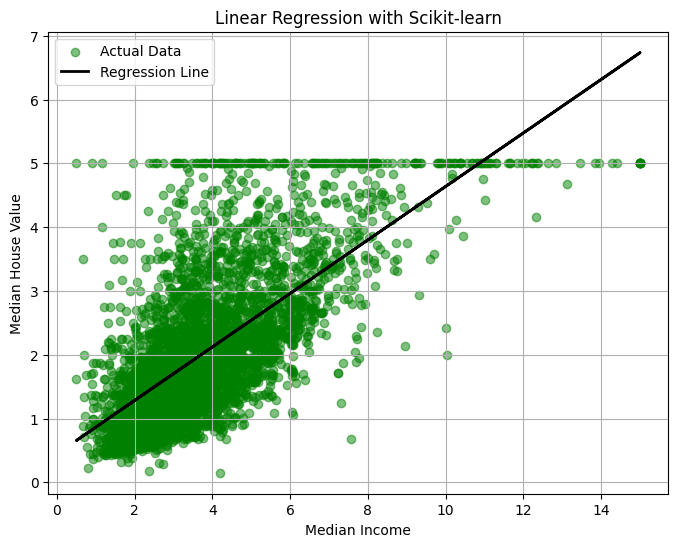

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load and Prepare Data
housing = fetch_california_housing()
X = housing.data[:, 0].reshape(-1, 1) # Median Income
y = housing.target # Median House Value

# 2. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Model Training
# Create a Linear Regression model instance
model = LinearRegression()
# Fit the model to the training data
model.fit(X_train, y_train)

print("--- Scikit-learn Model ---")
print(f"Intercept: {model.intercept_:.4f}")
print(f"Coefficient: {model.coef_[0]:.4f}\n")

# 4. Evaluation
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("--- Model Evaluation ---")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}\n")

# 5. Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color="green", alpha=0.5, label="Actual Data")
plt.plot(X_test, y_pred, color="black", linewidth=2, label="Regression Line")
plt.title("Linear Regression with Scikit-learn")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


--- Keras Model ---
Intercept: 0.4703
Coefficient: 0.4065

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
--- Model Evaluation ---
Mean Squared Error (MSE): 0.7098
R² Score: 0.4583



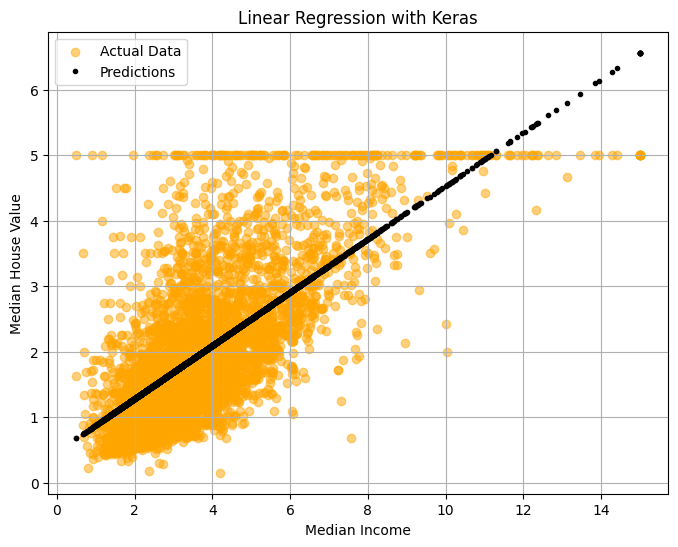

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 1. Load and Prepare Data
housing = fetch_california_housing()
X = housing.data[:, 0].reshape(-1, 1).astype(np.float32)
y = housing.target.reshape(-1, 1).astype(np.float32)

# 2. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Feature Scaling (Important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Model Definition and Training
# A Sequential model with one Dense layer is a linear regression model
model = Sequential([
    Dense(1, input_shape=(1,)) # One neuron, one input feature
])

# Compile the model with an optimizer and loss function
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mse')

# Train the model
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=10,  # Reduced number of epochs
    verbose=0 # Suppress epoch output for cleaner results
)

# Extract learned weights
weights, bias = model.layers[0].get_weights()
# Note: The coefficient is scaled, need to un-scale for direct comparison
coefficient = weights[0][0] / scaler.scale_[0]
intercept = bias[0] - (weights[0][0] * scaler.mean_[0] / scaler.scale_[0])

print("--- Keras Model ---")
print(f"Intercept: {intercept:.4f}")
print(f"Coefficient: {coefficient:.4f}\n")

# 5. Evaluation
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("--- Model Evaluation ---")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}\n")

# 6. Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color="orange", alpha=0.5, label="Actual Data")
plt.plot(X_test, y_pred, 'k.', label='Predictions') # Plotting as dots for clarity
plt.title("Linear Regression with Keras")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.legend()
plt.grid(True)
plt.show()

--- PyTorch Model ---
Intercept: 0.1657
Coefficient: 0.3999

--- Model Evaluation ---
Mean Squared Error (MSE): 0.8373
R² Score: 0.3611



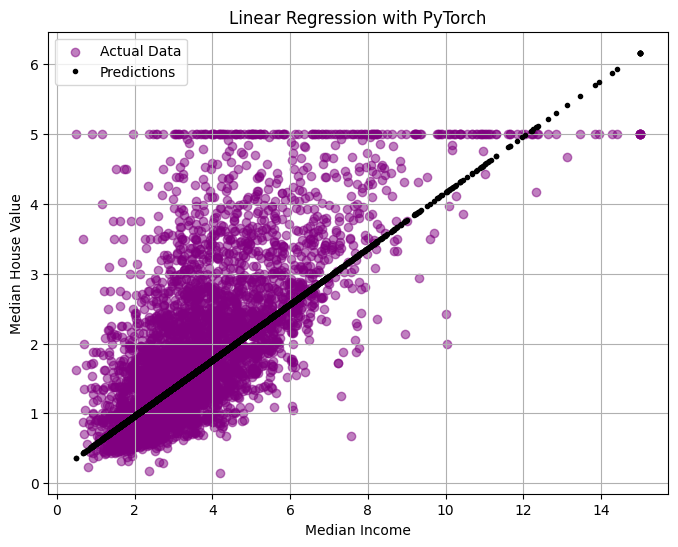

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 1. Load and Prepare Data
housing = fetch_california_housing()
X = housing.data[:, 0].reshape(-1, 1)
y = housing.target.reshape(-1, 1)

# 2. Train/Test Split
X_train_np, X_test_np, y_train_np, y_test_np = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Feature Scaling
scaler = StandardScaler()
X_train_scaled_np = scaler.fit_transform(X_train_np)
X_test_scaled_np = scaler.transform(X_test_np)

# 4. Convert to PyTorch Tensors
X_train = torch.from_numpy(X_train_scaled_np.astype(np.float32))
y_train = torch.from_numpy(y_train_np.astype(np.float32))
X_test = torch.from_numpy(X_test_scaled_np.astype(np.float32))
y_test = torch.from_numpy(y_test_np.astype(np.float32))

# 5. Model, Loss, and Optimizer
model = nn.Linear(1, 1) # One input feature, one output
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# 6. Training Loop
epochs = 100
for epoch in range(epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# 7. Extract Parameters and Un-scale them
# The learned parameters correspond to the scaled data
scaled_coeff = model.weight.data.item()
scaled_intercept = model.bias.data.item()

# Convert back to original scale for interpretation
coefficient = scaled_coeff / scaler.scale_[0]
intercept = scaled_intercept - (scaled_coeff * scaler.mean_[0] / scaler.scale_[0])

print("--- PyTorch Model ---")
print(f"Intercept: {intercept:.4f}")
print(f"Coefficient: {coefficient:.4f}\n")

# 8. Evaluation
with torch.no_grad():
    y_pred_tensor = model(X_test)
    y_pred = y_pred_tensor.numpy()

mse = mean_squared_error(y_test_np, y_pred)
r2 = r2_score(y_test_np, y_pred)

print("--- Model Evaluation ---")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}\n")

# 9. Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_test_np, y_test_np, color="purple", alpha=0.5, label="Actual Data")
plt.plot(X_test_np, y_pred, 'k.', label='Predictions')
plt.title("Linear Regression with PyTorch")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.legend()
plt.grid(True)
plt.show()


--- TensorFlow Core API Model ---
Intercept: -0.0085
Coefficient: 0.4614

--- Model Evaluation ---
Mean Squared Error (MSE): 0.8051
R² Score: 0.3856



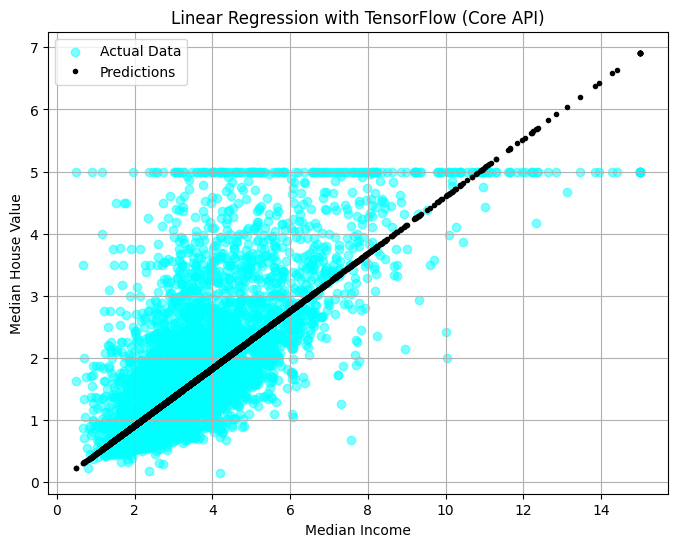

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 1. Load and Prepare Data
housing = fetch_california_housing()
X = housing.data[:, 0].reshape(-1, 1).astype(np.float32)
y = housing.target.reshape(-1, 1).astype(np.float32)

# 2. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Parameters and Model Definition
# Define trainable variables for weight (coefficient) and bias (intercept)
W = tf.Variable(tf.random.normal(shape=(1, 1)), name="weight")
b = tf.Variable(tf.random.normal(shape=(1,)), name="bias")

def linear_regression(x):
    return x @ W + b

# 5. Loss Function and Optimizer
def mse_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

optimizer = tf.optimizers.SGD(learning_rate=0.01)

# 6. Training Loop
epochs = 100
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        y_pred = linear_regression(X_train_scaled)
        loss = mse_loss(y_train, y_pred)

    gradients = tape.gradient(loss, [W, b])
    optimizer.apply_gradients(zip(gradients, [W, b]))

# 7. Extract and Un-scale Parameters
scaled_coeff = W.numpy()[0, 0]
scaled_intercept = b.numpy()[0]

coefficient = scaled_coeff / scaler.scale_[0]
intercept = scaled_intercept - (scaled_coeff * scaler.mean_[0] / scaler.scale_[0])

print("--- TensorFlow Core API Model ---")
print(f"Intercept: {intercept:.4f}")
print(f"Coefficient: {coefficient:.4f}\n")

# 8. Evaluation
y_pred = linear_regression(X_test_scaled).numpy()
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("--- Model Evaluation ---")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}\n")

# 9. Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color="cyan", alpha=0.5, label="Actual Data")
plt.plot(X_test, y_pred, 'k.', label='Predictions')
plt.title("Linear Regression with TensorFlow (Core API)")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.legend()
plt.grid(True)
plt.show()
